 # Labsession 2 (Week 10): 
 <h3>  Generating some random networks using R’s functionality </h3>

<h3>Part 1....</h3>

In [1]:
library("igraph")

Warning message:
"package 'igraph' was built under R version 4.1.2"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




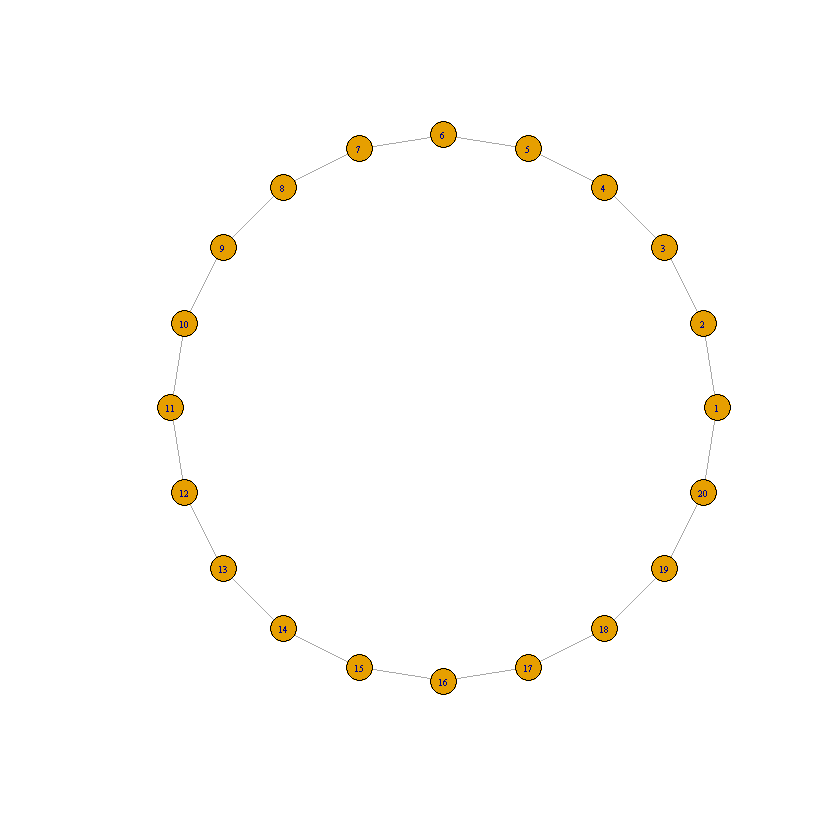

In [2]:
# Create a random regular plot with 20 nodes using the ring function

g=graph.ring(n=20)
plot.igraph(g,layout=layout.circle, vertex.size=10,vertex.label.cex=0.5)

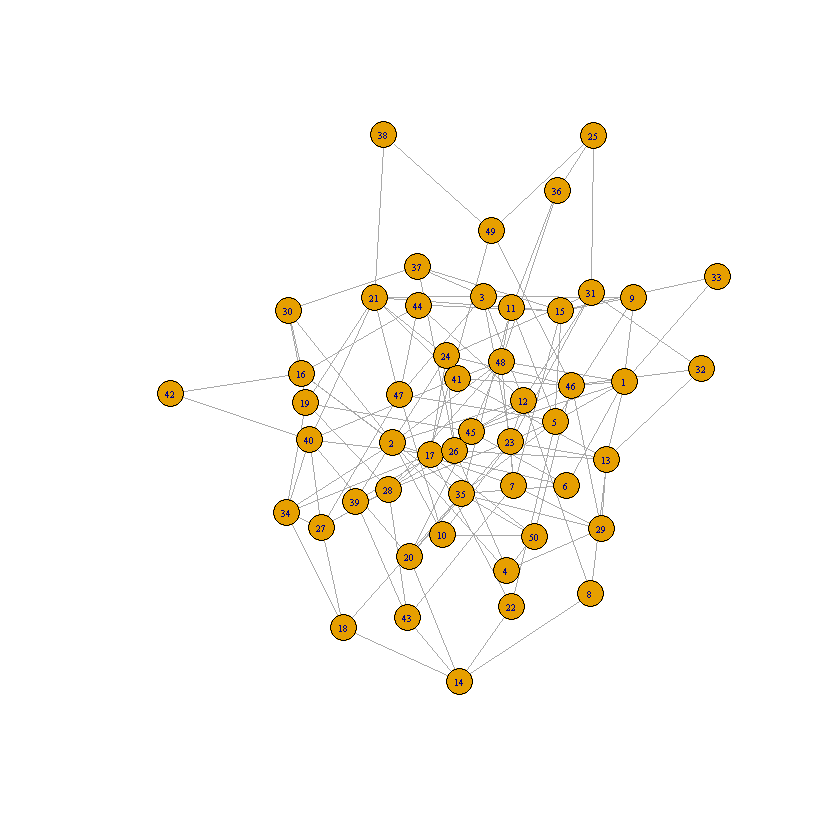

In [3]:
# A random graph (here an Erdos-Renyi type of graph with 50 vertices and 0.1 probability of edge):
# S/N: A Erdős–Rényi model is either of two closely related models
    #  for generating random graphs or the evolution of a random network.

g=erdos.renyi.game(n=50,p.or.m=0.1,type='gnp')
plot.igraph(g,layout=layout.fruchterman.reingold,vertex.size=10,vertex.label.cex=0.5)

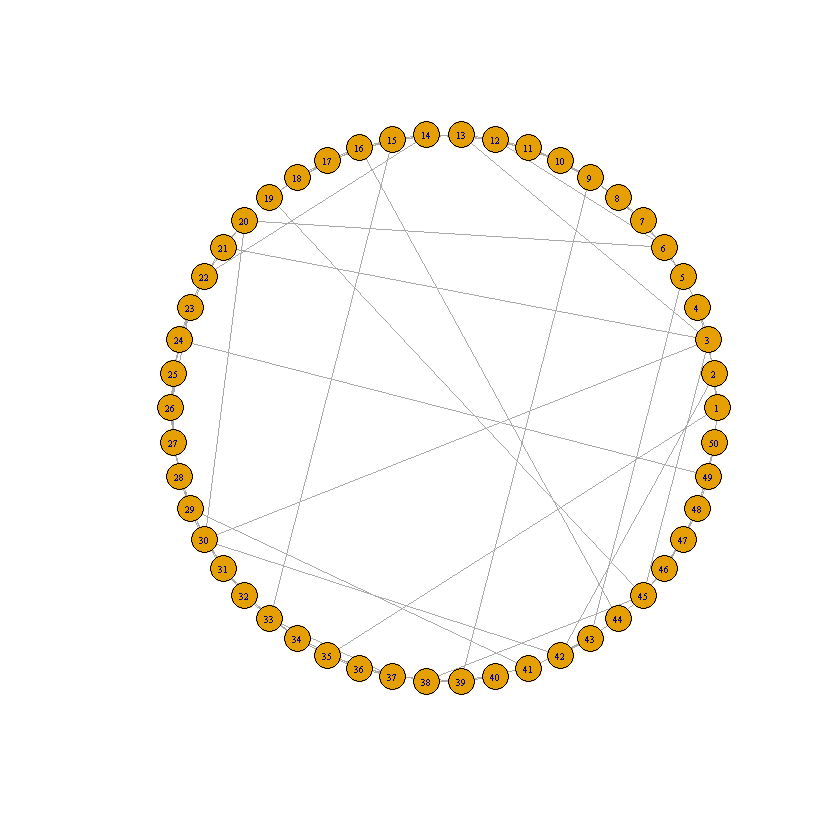

In [4]:
# Generate a Watts-Strogatz small world graph :::
# watts.strogatz.game() function takes args: dim, size ,nei, p
# dim specifies the dim of a basic network when dim = 1
# (with initial network being a ring with 50 vertices and 2 neighbours on each side; probability of rewiring is 0.1)

g = watts.strogatz.game(dim=1, size=50, nei=2, p=0.1)

plot.igraph(g,layout=layout.circle,vertex.size=10,vertex.label.cex=0.5)

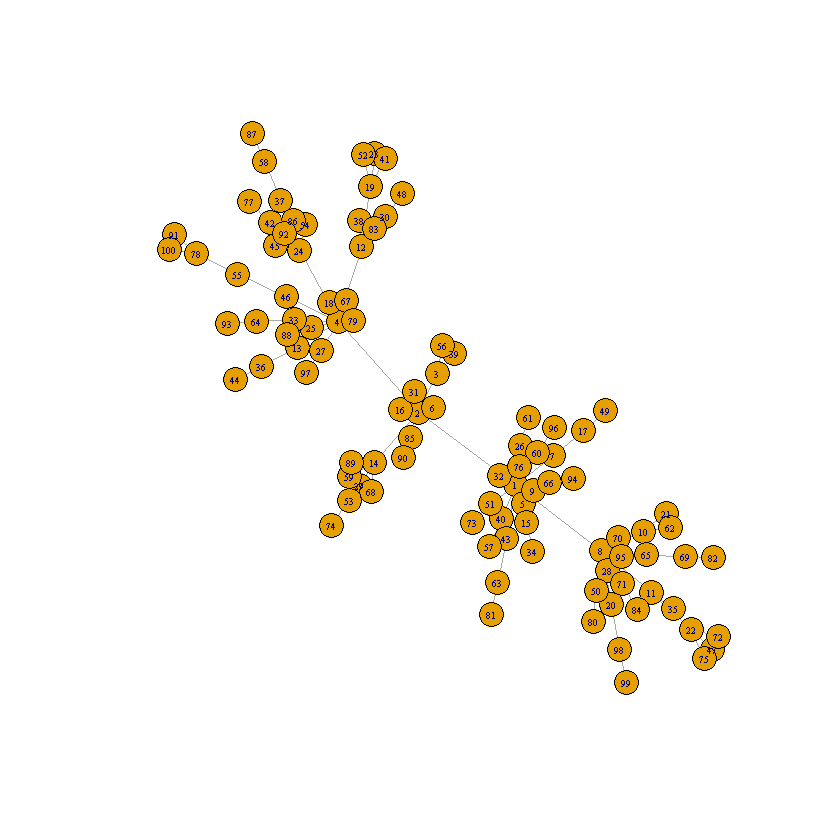

In [5]:
# scale-free(Barabasi) network (with 100 vertices) is generated by the following code:

g=barabasi.game(n=100,directed=F)

plot.igraph(g,layout=layout.auto,vertex.size=9,vertex.label.cex=0.5)

<h3>Part 2....</h3>

<p> A <b>vertex degree</b> is the number of edges going out of (and into) the given vertex. For regular networks, this is a fixed number.  <b>A network can be characterised by an average degree</b></p>
<p> <b>Average path length</b> is calculated by finding the shortest path between all pairs of vertices, adding them up, and then dividing by the total number of pairs. This shows us, on average,<b> the number of steps it takes to get from one member of the network to another</b>.</p>
<p> The <b>clustering coefficient</b> is a measure of the <i>“all-my-friends-know-each-other”</i> property. </p>

In [6]:
# NOw we create a very large random network with 5000 vertices and p = 0.005 using the Erdos-Renyi algorithm
#  this will also create approx. 62,500 edges
glarge=erdos.renyi.game(n=5000,p=0.005)

<p> For this network we expect the average degree to be approximately 25 [=0.005*(5000-1)], and therefore the average path length of 2.6 and the clustering coefficient would be equal to 0.005.<b> We can check these values by calculating:</b></p>

In [7]:
# Clustering:
transitivity(glarge)

[1] 0.004954315

In [8]:
# Average path length:
average.path.length(glarge)

[1] 2.93468

In [9]:
# Average degree:
mean(degree(glarge))

[1] 24.7832

<p> <b>Note:</b> there may exist some discrepancy between the results and the theoretical values – the networks in R are generated with some randomness (a.k.a. stochasticity) so there will be some slight differences in these values.</p>

<h4>Exercise 4::</h4>
<p> Using the above code('glarge'), generate 2-3 examples of networks with the same size, but change the parameters (e.g., for random Erdos-Renyi networks change the parameter p). Then obtain the basic statistics that are shown above.</p>

In [10]:
glarge1 = erdos.renyi.game(n=5000,p=0.2)
glarge2 = erdos.renyi.game(n=5000,p=0.8)

In [11]:
paste(transitivity(glarge1))
paste(average.path.length(glarge1))
paste(mean(degree(glarge1)))

[1] "0.200027999921432"

[1] "1.7999800760152"

[1] "999.8996"

In [12]:
paste(transitivity(glarge2))
paste(average.path.length(glarge2))
paste(mean(degree(glarge2)))

[1] "0.799883988230894"

[1] "1.20011882376475"

[1] "3998.606"

<h4>Exercise 5::</h4>
<p>The <b>closeness centrality</b> of a network node/vertex is defined by the inverse of the average length of the shortest paths to/from all the other vertices in the graph. The more central a vertex is, the lower its total distance to all other vertices. </p>
<p> Closeness can be regarded as a measure of how long it will take to spread information from a given vertex to all other vertices sequentially. </p>

<p> <b>Question:</b> Generate your own network using some of the functions we have seen previously, then <b>use the code below</b> and the code given previously to <b>represent the degree by size of each vertex</b> and the closeness by colour</p>

<p>Check whether your results agree with a definition of closeness.</p>

In [13]:
# The following code associates the vertex colour with closeness :::

colors.new=rev(rainbow(10,end=2/3))
net.close=as.numeric(closeness(g))       # replace g with graph name
net.close=floor((net.close-min(net.close))/diff(range(net.close))*(length(colors.new)-1) +1)
V(g)$color=colors.new[net.close]         # replace g with graph name

[1] "0.449739130434783"

[1] "1.56153846153846"

[1] "Vertex Degree is 17.1"

[1] "closeness centrality = 0.640394088669951"

[1] "0.659026416885303"

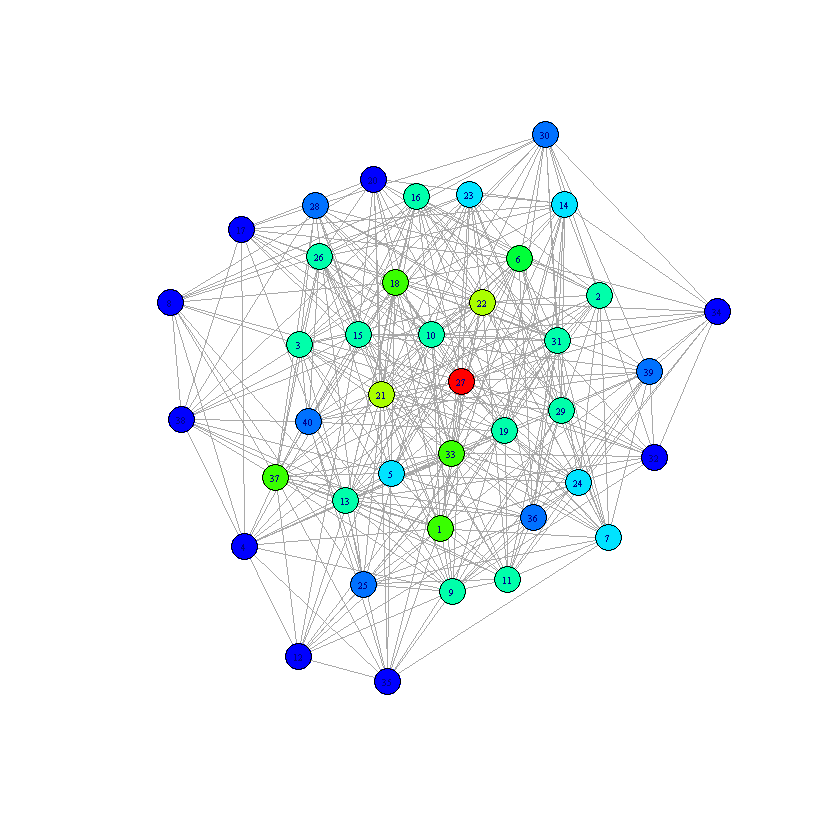

In [14]:
# now lets build the network...

glarge3 = erdos.renyi.game(n=40,p=0.45)    # network generated

colors.new=rev(rainbow(10,end=2/3))
net.close=as.numeric(closeness(glarge3))
net.close=floor((net.close-min(net.close))/diff(range(net.close))*(length(colors.new)-1) +1)
V(glarge3)$color=colors.new[net.close]

plot.igraph(glarge3,layout=layout.fruchterman.reingold,vertex.size=10,vertex.label.cex=0.5)

paste(transitivity(glarge3))
paste(average.path.length(glarge3))
paste("Vertex Degree is",mean(degree(glarge3)))
paste("closeness centrality =",1/average.path.length(glarge3))
paste(sum(closeness(glarge3)))

<h4>Exercise 6::</h4>

<p> The <b>betweenness of a vertex </b>reflects the importance of each vertex in passing information between different vertices. It is defined as a normalized number of shortest paths between each vertex on a network passing through the given vertex.</p>

<p>  Thus, vertices with very high betweenness have many paths going through them – and are therefore very important.</p>

<p><b>Note: </b>You will need to adjust the number of colours in the rainbow command to be able to distinguish between different values of betweenness, as it distribution tends to be quite skewed!</p>

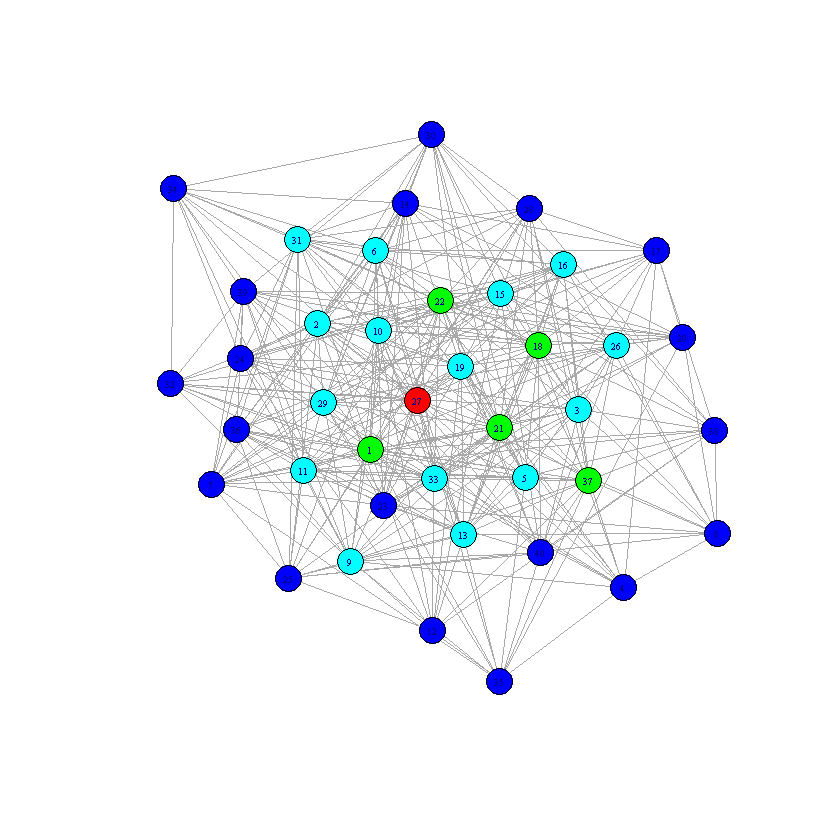

In [15]:
# Swap closeness() function with betweenness() in line 2 to rep betweeness of each vertex by color

colors.new=rev(rainbow(5,end=2/3))
net.close=as.numeric(betweenness(glarge3))
net.close=floor((net.close-min(net.close))/diff(range(net.close))*(length(colors.new)-1) +1)
V(glarge3)$color=colors.new[net.close]

plot.igraph(glarge3,layout=layout.auto,vertex.size=10,vertex.label.cex=0.5)

# ...

<h3>Part 3 : More on Plotting graphs.......</h3>
<p> In igraph, a network is an object containing all information about the graph - its vertices, edges, names, colours, etc. To access vertices and edges of a graph g, two functions are used, <b>V(g) and E(g)</b>.</p>

<p>  The first one gives us the ability to list and manipulate a graph’s vertices, <b>with V(g)[1]</b> corresponding to the first vertex in the graph and so on. Similarly, <b>E(g)[1]</b> is the first edge.</p>

<p> The object g contains all information needed to describe the network. We can access, add to, and modify this information. We can also add information that will subsequently be used by plot.igraph to graphically represent the vertices.</p>

+ 99/99 edges from bcfc7b6:
 [1]  1-- 2  2-- 3  3-- 4  3-- 5  2-- 6  2-- 7  7-- 8  8-- 9  2--10  3--11
[11]  4--12  2--13  3--14  2--15  4--16  5--17  3--18  9--19  3--20  1--21
[21]  2--22 14--23 15--24 15--25  3--26  3--27  3--28  4--29 17--30 16--31
[31] 27--32  1--33 18--34 27--35  2--36  2--37 18--38 31--39  9--40 32--41
[41]  4--42  2--43 15--44 18--45 17--46 23--47  2--48  2--49  2--50  2--51
[51] 24--52  2--53 44--54 26--55 49--56  2--57  3--58  4--59 53--60 46--61
[61]  4--62 40--63 12--64  5--65 24--66  3--67  2--68  2--69 16--70  2--71
[71] 53--72 53--73 59--74 15--75  2--76  7--77  2--78 71--79 27--80 69--81
[81] 73--82  4--83  2--84  3--85 66--86  4--87  3--88 82--89  2--90 73--91
[91] 38--92  2--93  2--94 58--95 54--96  8--97  2--98  3--99
+ ... omitted several edges


[1] "----------------------------------------------------------------------------------------------------------------------"

+ 100/100 vertices, from bcfc7b6:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100


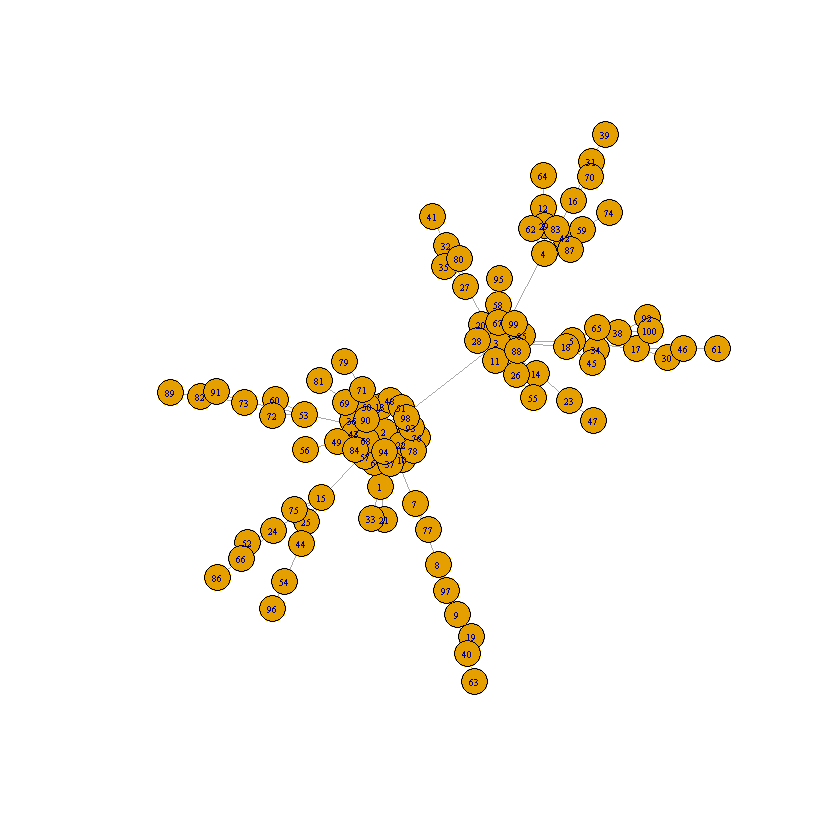

In [24]:
# lets generate a scale free network and then list all edges and vertices
g=barabasi.game(100,directed=F,power=1.5)

plot.igraph(g,layout=layout.auto,vertex.size=10,vertex.label.cex=0.5)

print(E(g))
paste("----------------------------------------------------------------------------------------------------------------------")
print(V(g))

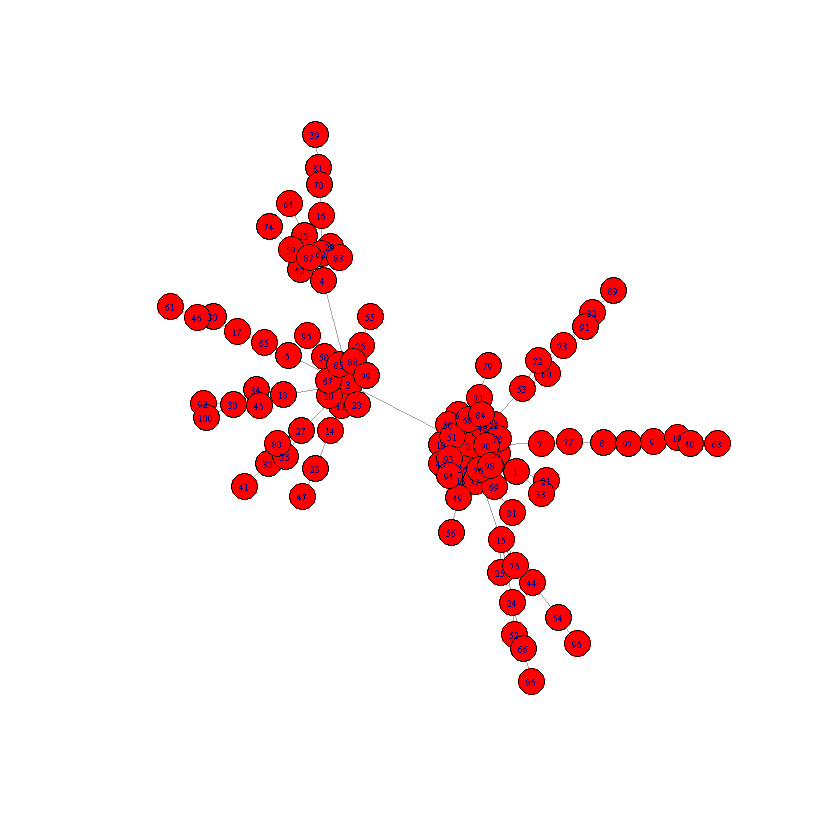

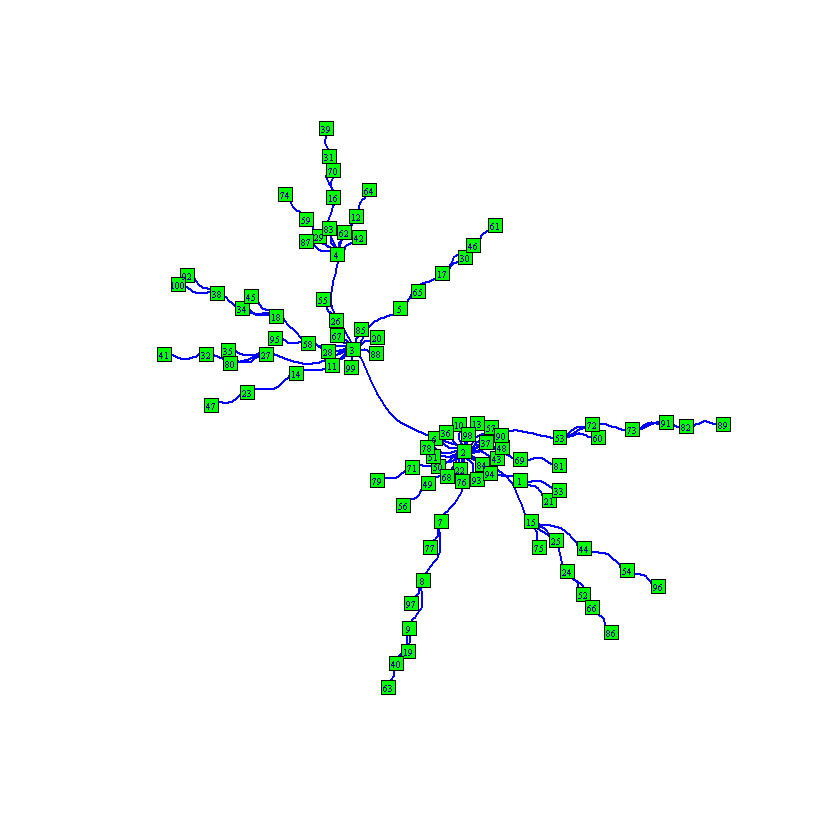

In [25]:
# We have already learned how to specify some plotting parameters globally (i.e., for all vertices) such as here:

plot.igraph(g, vertex.color="red", vertex.size=10, vertex.label.cex=0.5)

#or even:

plot.igraph(g, vertex.color="green", vertex.size=5, vertex.label.cex=0.5, vertex.shape="square", 
            edge.color="blue", edge.width=2, edge.curved=T)

<p> <b>The most useful and common options for plotting vertices are: </b>

<ul>
  <li>vertex.color (setting the colour of the vertices)</li>
  <li>vertex.size (setting the size of the vertices)</li>
  <li>vertex.label.cex (setting the size of the labels)</li>
  <li>vertex.label=NA (if we do not want labels)</li>
</ul> 

</p>

<p> <b>The most useful options for edges are:</b>
    

<ul>
  <li>edge.color (setting the colour of the links)</li>
  <li>edge.width (setting the width of the lines)</li>
  <li>edge.curved=T (specifies that links are represented by curves)</li>
  <li>edge.curved=F (if this is set to this, or not set at all, the links are straight lines)</li>
</ul>    

</p>

<p> The options can be set for each vertex and edge separately. One way of doing this is to add this information to the graph object. </p>

<p> We can do it for selected vertices and edges, as both <b>E(g) and V(g) are vectors so can be accessed by indexing.</b> </p>

<p> We can then assign some characteristics, for example colour, to individual vertices.</p>

<h4> Now In the example below we colour the first 10 edges, then the rest in green, and the first 5 vertices in red and the rest of the vertices in yellow (Note: that R begins indexes from 1 and not 0)</h4>

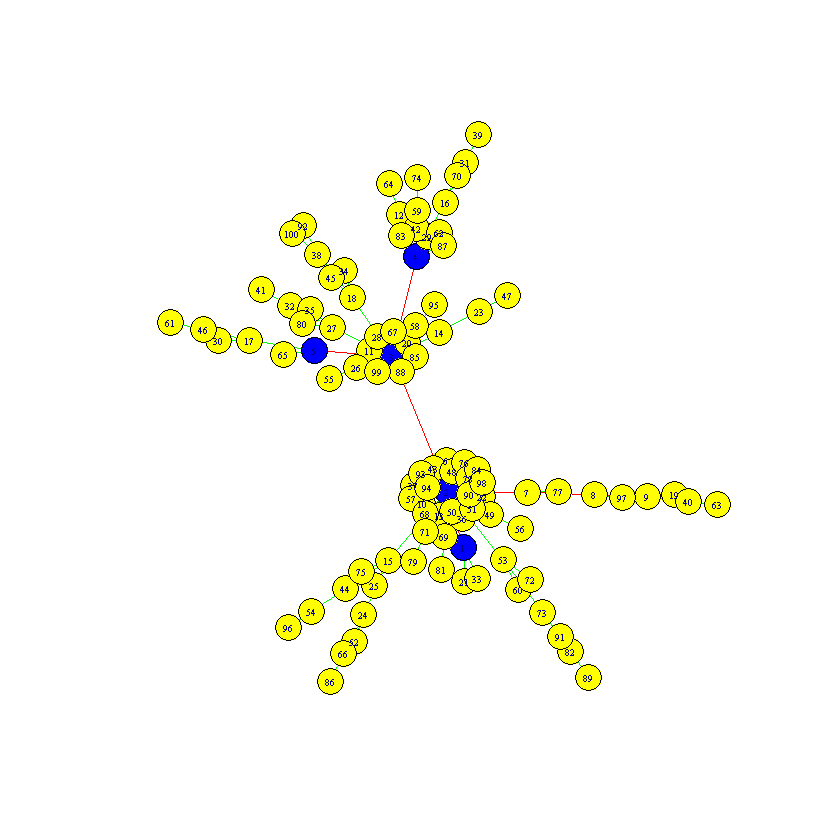

In [26]:
E(g)[1:10]$color="red"  # first 10 edges as red

E(g)[11:length(E(g))]$color = "green" # rest of edges as green

V(g)[1:5]$color="blue" # first 5 nodes as blue

V(g)[6:length(V(g))]$color = "yellow" # rest of nodes as yellow

plot.igraph(g,layout=layout.auto,vertex.size=10,vertex.label.cex=0.5)

<h4> Using Degree information to set size of a vertex</h4>

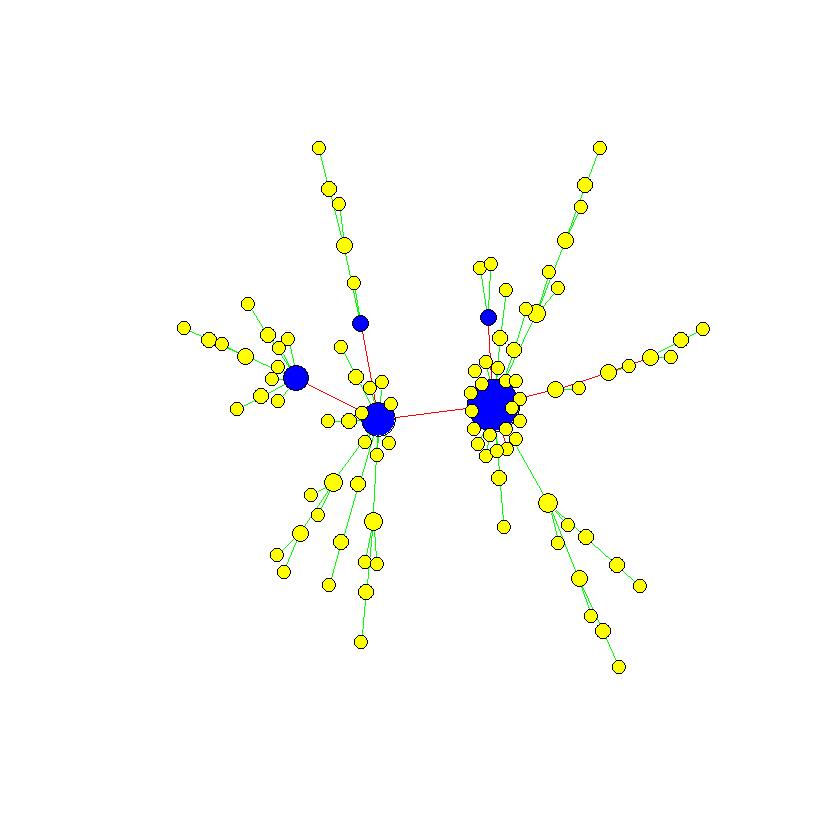

In [27]:
# We can also assign colours or sizes to all vertices in one go. 
# Eg. we can use the degree information to set the size of the vertex, like in the following example:

V(g)$size=5+15/diff(range(degree(g)))*degree(g)

plot.igraph(g,vertex.label=NA)

# Explanation
# The first line associates the degree of each vertex to the vertex information in g. 
# In the example above, the smallest size of a circle representing a vertex with no connections is 5.
# This increases with a degree up to a maximum value of 20.
# The last option stops labels appearing on the vertices (to avoid seeing lots of numbers!).

In [28]:
V(g)[[]]

+ 100/100 vertices, from bcfc7b6:
     color      size
1     blue  6.730769
2     blue 20.576923
3     blue 13.653846
4     blue 10.192308
5     blue  6.730769
6   yellow  5.576923
7   yellow  6.730769
8   yellow  6.730769
9   yellow  6.730769
10  yellow  5.576923
11  yellow  5.576923
12  yellow  6.153846
13  yellow  5.576923
14  yellow  6.153846
15  yellow  7.884615
16  yellow  6.730769
17  yellow  6.730769
18  yellow  7.307692
19  yellow  5.576923
20  yellow  5.576923
21  yellow  5.576923
22  yellow  5.576923
23  yellow  6.153846
24  yellow  6.730769
25  yellow  5.576923
26  yellow  6.153846
27  yellow  7.307692
28  yellow  5.576923
29  yellow  5.576923
30  yellow  5.576923
31  yellow  6.153846
32  yellow  6.153846
33  yellow  5.576923
34  yellow  5.576923
35  yellow  5.576923
36  yellow  5.576923
37  yellow  5.576923
38  yellow  6.730769
39  yellow  5.576923
40  yellow  6.153846
41  yellow  5.576923
42  yellow  5.576923
43  yellow  5.576923
44  yellow  6.153846
45  yellow  5.576923


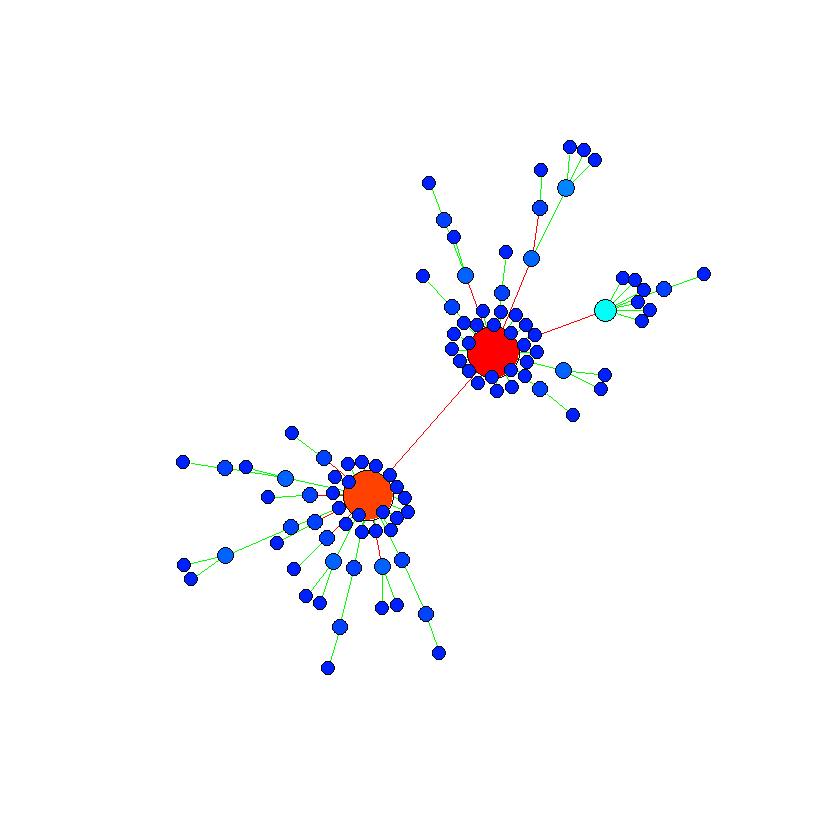

In [20]:
# A more complicated example shows how to associate different colours with the degree:

colors.new=rev(rainbow(max(degree(g))+1,end=2/3))

V(g)$color=colors.new[degree(g)+1]

plot.igraph(g,vertex.label=NA)

# Explanation::
# The first line creates a set of colours from a rainbow 
# (+1 is needed because we could have vertices with degree 0 and rainbow starts with colour 1; 
#  end=2/3 stops the colours at dark blue instead of going to the end of the rainbow!; 
#  rev() reverses the order of the colours – so red represents the most connected vertex).

# ....

# (Last) Exercise 7: Facebook Network Exercise

<p>In this last section of the practical, you will analyse a <b>real (anonymized) network of Facebook contacts</b>; the network data are provided (unfortunately, in 2015, Facebook stopped individuals from being able to access data to form a network).</p>

<p> Import into R/Rstudio the file MATPMD2_FacebookEL.csv. It contains an edge list of contacts:</p>

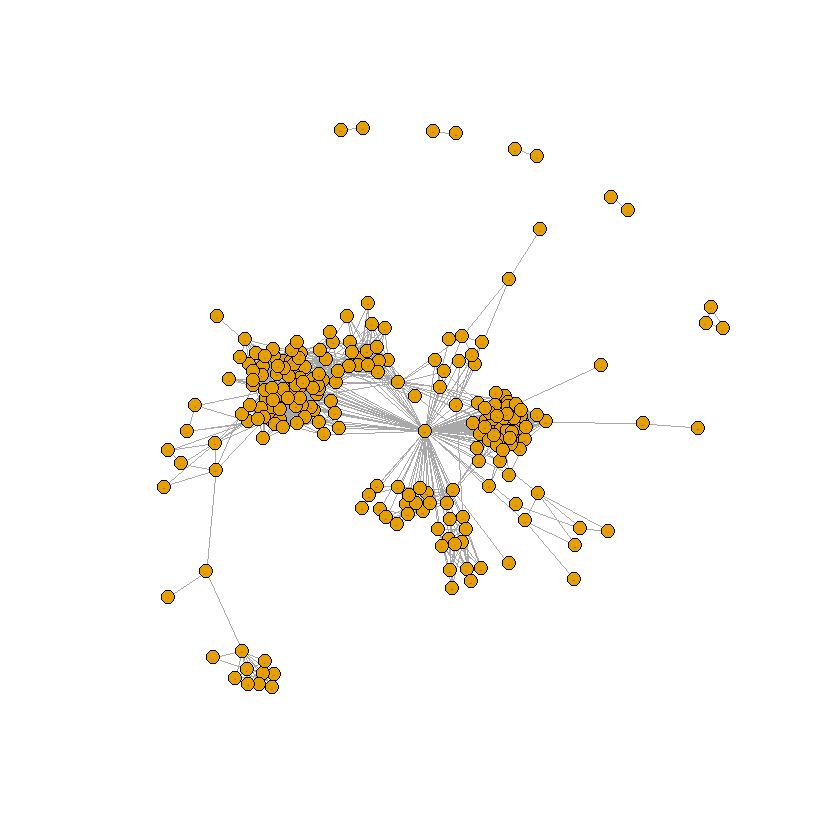

In [21]:
dat=read.csv('MATPMD2_FacebookEL.csv',header=TRUE)

el=as.matrix(dat)   #convert data frame to matrix

el[,1]=as.character(el[,1]) 

el[,2]=as.character(el[,2])

g=graph.edgelist(el,directed=FALSE)

plot.igraph(g,vertex.size=5,vertex.label.cex=0.1)

<h3> Questions </h3>
<p> Find the <b>clustering coefficient, average path length and mean degree</b>, and <b>identify the nodes with greatest betweenness and closeness.</b> </p>

<p> Modify the code so that the size of the vertices represents their degree and colour represents closeness. You might need to experiment with the coefficients in the code to achieve this.<p>

Note:  There are some further, advanced questions within the MS Word document version of this practical at <b>MATPMD2 - Practical 2.docx</b> which provide further practice and information on more mathematical aspects of different network types.